<a href="https://colab.research.google.com/github/Jnyambok/Python-Utility-Functions/blob/main/Python_Utility_Functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Python Utility Functions, Algorithms and Data Structures**
This notebook serves as a playground for playing with python utility functions.
Adapted from various sources such as :

1.   [How to Define Python Utility Functions](https://labex.io/tutorials/python-how-to-define-python-utility-functions-419853)
2.    [Problem Solving with Algorithms and Data Structures using Python](https://runestone.academy/ns/books/published/pythonds/index.html)

The best practices for functions are:


1.  Keep functions focused on a single task
2.  Use clear and descriptive names
3.  Use type hints and docstrings
4.  Handle potential edge cases
5.  Prefer pure functions when possible

Effective utility functions should have:

1.   A single, well-defined responsibility
2.   Clear input and output expectations.
3.    Minimal side effects



# **1. Docstrings**

**Docstrings** short for documentation strings provide a convenient way of associating documentation with Python Modules, functions, classes and methods.
They are declared using triple quotes and can be accessed using the __doc__ method of an object or using the help function.

In [ ]:
def addition():
  """
  Demonstrates the triple double quotes docstrings and does nothing really

  """

  return None

print(addition.__doc__)
help(addition)

Help on function addition in module __main__:

addition()
    Demonstrates the triple double quotes docstrings and does nothing really



Google Style docstrings follow a specific format and provide a structured way to document Python Code including parameters, return values and descriptions

In [ ]:

def multiply_numbers(a,b):

  """
  Multiplies two numbers and returns the result

  Args:
  a (int) : The first number
  b (int) : The second number

  Returns:
  int : The product of the two numbers
  """

  return a*b


print(multiply_numbers(3,5))
help(multiply_numbers)


15
Help on function multiply_numbers in module __main__:

multiply_numbers(a, b)
    Multiplies two numbers and returns the result
    
    Args:
    a (int) : The first number
    b (int) : The second number
    
    Returns:
    int : The product of the two numbers



# **2. Function Design Patterns**
A good function should have error handling, type hinting, documentation strings and input validation
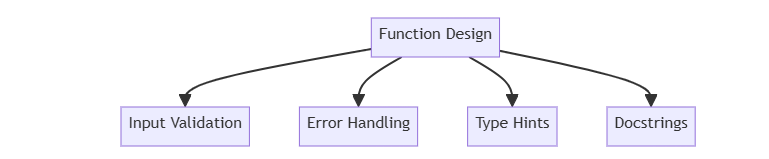

### Type Hints

In my own words, Type Hints borrows a little bit from static-typed language where it implements the functionality of being able to specify variable types before running.
Type Hinting provides a clear expectation of the variable types as one is defining the method.
In Python, Numeric Abstract Base Classes (ABCs) are a set of classes provided in the built-in numbers module. They define a standard hierarchy for different types of numbers, allowing you to check if an object behaves like a particular kind of number, regardless of its specific concrete class.

It does have some pitfalls that you would look at for [
  here](https://www.reddit.com/r/Python/comments/10zdidm/why_type_hinting_sucks/)



In [ ]:
## Lets define a simple function that returns the number of char in a name

def count_chars(name: str) -> int:
  """
  Definition : A function that takes in the name of a person and returns the number of characters

  Args:
  name (str) : The name of the person

  Returns:
  int : The number of characters in the name

  """

  return len(name)

help(count_chars)

Help on function count_chars in module __main__:

count_chars(name: str) -> int
    Definition : A function that takes in the name of a person and returns the number of characters
    
    Args: 
    name (str) : The name of the person
    
    Returns:
    int : The number of characters in the name



In [ ]:
count_chars("Julius")

6

### Exception Handling and Input Validation
Write a program that separates the quantity from the item i.e 2 x Mushrooms to a df having Item | Quantity. And if its just a string it list just 1 as quantity

In [ ]:
import pandas as pd
import re

sku = ["2 x Tropical Heat Cumin" , "3 x Tomatoes" , "1 x Onion", "Crisps"]
shopping_list = pd.DataFrame(columns = ["Item" , "Quantity"])

def item_splitter (items_list : list[str]) -> pd.DataFrame :
  """
  Definition : A function that takes a product list and separates the item from the quantity

  Args:
  list (str) : String of items

  Returns:
  DataFrame : A dataframe with the item and quantity

  """
  if not isinstance(items_list, list):
    raise TypeError("Input 'items_list' must be a list.")

  for item in items_list:
    try:
      match = re.match(r'^\s*(\d+)\s*x\s*(.*)$', item)
      if match:
        item_number = int(match.group(1))
        item_name = match.group(2)
      else:
        item_number = 1
        item_name = item

      shopping_list.loc[len(shopping_list)] = [item_name, item_number]

    except Exception as e:
      print(f"Error processing item '{item}': {e}")

  return shopping_list

item_splitter(sku)




,Item,Quantity
0,Tropical Heat Cumin,2
1,Tomatoes,3
2,Onion,1
3,Crisps,1


In [ ]:
import pandas as pd
import re
from typing import List

# Define your input data (sku list) in the global scope.
# This list is *not* modified by the pure function, so it's fine.
sku = ["2 x Tropical Heat Cumin", "3 x Tomatoes", "1 x Onion", "Crisps"]

def item_splitter_pure(items_list: List[str]) -> pd.DataFrame:
    """
    Definition : A pure function that takes a product list and separates the item from the quantity

    Args:
        items_list (List[str]): List of item strings (e.g., "2 x Tropical Heat Cumin").

    Returns:
        pd.DataFrame: A new DataFrame with 'Item' and 'Quantity' columns.
    """
    if not isinstance(items_list, list):
        raise TypeError("Input 'items_list' must be a list.")

    # Create a new DataFrame *inside* the function's scope for each call
    rows_to_add = [] # Collect rows to add at once for efficiency

    for item_str in items_list:
        try:
            match = re.match(r'^\s*(\d+)\s*x\s*(.*)$', item_str)
            if match:
                quantity = int(match.group(1))
                item_name = match.group(2).strip()
            else:
                quantity = 1
                item_name = item_str.strip()

            rows_to_add.append({"Item": item_name, "Quantity": quantity})

        except Exception as e:
            # For a pure function, printing is a side effect.
            # In a real application, you might log this, or return an error indicator
            # within the DataFrame or a separate error list.
            print(f"Error processing item '{item_str}': {e}")

    # Create the DataFrame and return it
    result_df = pd.DataFrame(rows_to_add, columns=["Item", "Quantity"])
    return result_df

# Now, call the pure function, passing the 'sku' list as an argument
my_shopping_list_df = item_splitter_pure(sku)

print(my_shopping_list_df)

# If you call it again, you get a fresh, identical DataFrame
my_shopping_list_df_2 = item_splitter_pure(sku)
print("\nSecond call (should be identical):")
print(my_shopping_list_df_2)

                  Item  Quantity
0  Tropical Heat Cumin         2
1             Tomatoes         3
2                Onion         1
3               Crisps         1

Second call (should be identical):
                  Item  Quantity
0  Tropical Heat Cumin         2
1             Tomatoes         3
2                Onion         1
3               Crisps         1


OOP also exists in other programming languages and is often described to center around the four pillars, or four tenants of OOP:

  1. Encapsulation allows you to bundle data (attributes) and behaviors (methods) within a class to create a cohesive unit. By defining methods to control access to attributes and its modification, encapsulation helps maintain data integrity and promotes modular, secure code.

  2. Inheritance enables the creation of hierarchical relationships between classes, allowing a subclass to inherit attributes and methods from a parent class. This promotes code reuse and reduces duplication.

  3. Abstraction focuses on hiding implementation details and exposing only the essential functionality of an object. By enforcing a consistent interface, abstraction simplifies interactions with objects, allowing developers to focus on what an object does rather than how it achieves its functionality.

  4. Polymorphism allows you to treat objects of different types as instances of the same base type, as long as they implement a common interface or behavior. Python’s duck typing make it especially suited for polymorphism, as it allows you to access attributes and methods on objects without needing to worry about their actual class.


In [ ]:
class Hen:
    def __init__(self, name): # 1. 'name' is passed as an argument
        self.name = name   # 2. Using '_' convention for a "protected" attribute
                            # This indicates it's an internal detail,
                            # though still accessible if you really try.

    def make_sound(self): # 3. 'self' is the first argument
        return f"{self.name} is clucking" # 4. Accessing the internal name

    def get_name(self): # Optional: A getter method to access the name safely
        return self.name

# Creating an instance of the Hen class
baby_chick = Hen("Chicky")

# Accessing the method which operates on the internal data
print(baby_chick.make_sound())

# You can still directly access _name, but the '_' signals
# that you generally shouldn't directly modify it from outside.
# This demonstrates encapsulation by bundling the data (_name)
# and the method (make_sound) that operates on it.
print(f"The chick's name is: {baby_chick.get_name()}")

Chicky is clucking
The chick's name is: Chicky


# **3. Abstraction**

**Abstraction** allows you to hide internal details of a class and only exposing what is needed.
**Private attributes** can only be accessed within the class and should not be accessed from outside the class. However, it is important to note that the double underscore syntax is just a convention and not a strict rule.
The idea behind private attr:

  1. This is typically for methods/attributes that are strictly internal to the class and are unlikely to be used or overridden by subclasses.
  2. It's a stronger signal: "Keep your hands off! This is purely for the internal workings of this specific class."

Mostly for internal use, please be careful if accessing externally or in subclasses.
Can be accessed if someone specifically creates a function or means to access it


In [ ]:
from typing_extensions import reveal_type
class SecretKeeper:
  def __init__(self,secret_data):
    self.__secret_data = secret_data    ##Only this class should manage it

  def reveal_secret(self):
    return f"The secret is: {self.__get_processed_secret()}"

  def __get_processed_secret(self):
    #private method: internal processing not for external calls
    return self.__secret_data.upper()


keeper =  SecretKeeper("My secret")
print(keeper.reveal_secret())



The secret is: MY SECRET


In [ ]:
# Attempting direct access will fail because of name mangling:
#print(keeper.__secret_data)
# AttributeError: 'SecretKeeper' object has no attribute '__secret_data'

In [ ]:
class Person:
  def __init__(self,name,age):
    self.__private_attribute = age
    self.name = name

  def get_private_attribute(self):
    return self.__private_attribute

person = Person("John",30)
print(person.get_private_attribute())
print(person.__private_attribute)  ## will raise an error

30


AttributeError: 'Person' object has no attribute '__private_attribute'

In [ ]:
class Hen: #Grandmother Hen
    def __init__(self,name):
        self._name = name

    def make_sound(self):
        return f"{self._name} is clucking"

    def get_name(self):
        return self._name

class Chicky(Hen): # BabyChick inherits from Hen
    def __init__(self, name):
        # Call the parent class's constructor to initialize inherited attributes
        super().__init__(name) # This calls Hen's __init__ method

    def make_sound(self):
        # Baby chicks don't cluck, they peep! This is method overriding.
        return f"{self._name} is peeping"

# Now let's see it in action:
print("--- Inheritance Example ---")
mother_hen = Hen("Grandmother Hen")
print(f"Parent (Grandmother): {mother_hen.make_sound()}")

baby_chick = Chicky("Henrietta")
print(f"Grandchild: {baby_chick.make_sound()}") # Notice it calls Chicky's make_sound
print(f"GrandChild's name via inherited method: {baby_chick.get_name()}") # Uses Hen's get_name

--- Inheritance Example ---
Parent (Grandmother): Grandmother Hen is clucking
Grandchild: Henrietta is peeping
GrandChild's name via inherited method: Henrietta


In this example, the Person class has a private attribute __private_attribute that holds the person's age. The class has a public method get_private_attribute that returns the value of the private attribute. When trying to access the private attribute directly from outside the class, an AttributeError is raised, indicating that the attribute is not accessible. This protects the private attribute from being accidentally or intentionally modified from outside the class, maintaining the integrity of the class.

**Protected (_)**: "Internal use, please be careful if accessing externally or in subclasses." (Soft hint).
Meaning:

1. It's a strong hint to other developers: "This is an internal detail. Don't access or modify this directly from outside the class, or from subclasses unless you know exactly what you're doing."
2. It means: "I might change how this works internally without warning, so don't build external code that depends on it."

In [ ]:
class Person:
  def __init__(self,name,age):
    self._protected_attribute = "This is protected"
    self.name = name
    self.age = age

class Employee (Person):
  def display_protected_attribute(self):
    print(self._protected_attribute)


employee = Employee('Jane Doe',25)
employee.display_protected_attribute()
employee._protected_attribute

This is protected


'This is protected'

# **4. Polymorphism**

Polymorphism can be translated loosely to "many forms" A class can define an abstract method that can take many implementations

***When to Use Polymorphism Instead***

Instead of using a switch statement, we should refactor the design to leverage polymorphism if the number of cases is expected to grow. Here’s how:

1. Define an abstract base class or interface for payment processing.
2. Implement concrete classes for each payment type.
3. Use dependency injection or a factory to instantiate the correct class.

In [ ]:
from abc import ABC, abstractmethod # Import ABC and abstractmethod

class Device(ABC):

  @abstractmethod
  def start_device(self):
    pass

class electrical_vehicle(Device):
  def start_device(self):
    print("This EV is on the road")

class microwave(Device):
  def start_device(self):
    print("This microwave is working fine")

ev = electrical_vehicle()
mw = microwave()

ev.start_device()
mw.start_device()

devices = [electrical_vehicle(), microwave()]
for d in devices:
  d.start_device()

This EV is on the road
This microwave is working fine
This EV is on the road
This microwave is working fine


In [ ]:
from abc import ABC,abstractmethod

class SchoolBird(ABC):
  def __init__(self,name):
    self._name = name

  @abstractmethod
  def make_sound(self):
    #This is an abstract method
    #Any class (other bird species) inheriting
    ##MUST provide an implementation to how they want to make their own sound)
    pass

  @abstractmethod
  def introduce_self(self):
    #Another - method - every school bird must introduce oneself
    pass

  def get_name(self): #A concrete getter method that will inherit in the same way
    return self._name


# Now, our Chicky, Crow, and Duck classes must inherit from SchoolBird
# and implement its abstract methods.

class Chicky(SchoolBird):
  def __init__(self,name):
    super().__init__(name)

  def make_sound(self): #Polymorphism - each bird has its own way of making a sound
    return f"{self._name} is peeping!"

  def introduce_self(self): #Abstraction too! - Every bird is hiding how they introduce themselves
    return f"Hi, I'm {self._name}. I'm a Chicky."


class Crow(SchoolBird):
  def __init__(self,name):
    super().__init__(name)

  def make_sound(self): #Polymorphism - each bird has its own way of making a sound
    return f"{self._name} is cawing! Beware of my might!"

  def introduce_self(self): #Abstraction too! - Every bird is hiding how they introduce themselves
    return f"I'm {self._name}. Maths is my strongest subject."


class Duck(SchoolBird):
  def __init__(self,name):
    super().__init__(name)

  def make_sound(self): #Polymorphism - each bird has its own way of making a sound
    return f"{self._name} is quacking!"

  def introduce_self(self): #Abstraction too! - Every bird is hiding how they introduce themselves
    return f"{self._name} is my name. Nobody can swim faster than I."


print("\n--- Abstraction and Polymorphism in Action: School Bird Introductions ---")

chick_student = Chicky("Henrietta")
crow_student = Crow("Mighty Crow")
duck_student = Duck("Scrouge McDuck")

student_roster = [chick_student, crow_student, duck_student]
for student in student_roster:
    print(student.introduce_self())
    print(student.make_sound(),'\n') # And make their characteristic sound!



--- Abstraction and Polymorphism in Action: School Bird Introductions ---
Hi, I'm Henrietta. I'm a Chicky.
Henrietta is peeping! 

I'm Mighty Crow. Maths is my strongest subject.
Mighty Crow is cawing! Beware of my might! 

Scrouge McDuck is my name. Nobody can swim faster than I.
Scrouge McDuck is quacking! 



# **5.Inheritance**
 Inheritance establishes an "is-a" relationship.
 inheritance involves creating a parent-child relationship between two classes. The child inherits properties and behaviors from its parent, acquiring predefined characteristics without manual intervention


Occasionally, you might desire direct access to a parent’s private members. While encapsulation discourages tampering with internal states, certain situations warrant circumvention. Python provides two alternatives for reaching beyond immediate scope: super() and parent_class.__function__(instance).

In [ ]:
##Accessing private methods using Super
class Animal:
    def speak(self):
        raise NotImplementedError('speak')


class Mammal(Animal):
    def __give_birth(self):
        return 'Born alive.'

class Dog(Mammal):
    def speak(self):
        return 'Woof!'

doggy = Dog()
print (doggy.speak())
#print(super(Dog, doggy).give_birth())

Woof!


### Multiple Inheritance

In [ ]:
class Swim:
  def swimming(self):
    return "I can fly"


class Fly:
  def flying(self):
    return "oh and fly too"


class Duck(Swim,Fly):
  pass

duck = Duck()
print(duck.swimming())
print(duck.flying())

I can fly
oh and fly too


# **6. Formatting Text ( #10 on 100 days of Python)**
**a) Using the .format method**

In [ ]:
#Using the format method
stance = "Must Go Now"
print (" That guy {}".format(stance))

 That guy Must Go Now


**b) Using the % operator**

In [ ]:
#Using the % operator
stance = " I said that we must fight for our country"
print("%s. Must go now!" %stance)

 I said that we must fight for our country. Must go now!


**c) Using the f-strings**


In [ ]:
stance = "nchi yetu ya Kenya"
print(f'I love my country.{stance}')

I love my country.nchi yetu ya Kenya


# **7. Data Structures: Lists ( #11)**
**Lists** are used for ordered collection of items

In [ ]:
number = [1,2,3,4,5]
print(f'This is a list of numbers: {number}')

#The append() method allows you to add an item to the end of a list
names = ['Bob','Charles']
names.append('Cynthia')
print(f'These are the new names: {names}')
names.remove('Bob')
print(f'These are the new names: {names}')
#The del statement is a powerful way to remove items from a list.
#You can use it to remove a specific item by its index, or to remove a range of items:
del number[0]
print(f'These are the new names: {number}')

This is a list of numbers: [1, 2, 3, 4, 5]
These are the new names: ['Bob', 'Charles', 'Cynthia']
These are the new names: ['Charles', 'Cynthia']
These are the new names: [2, 3, 4, 5]




# **8. What is the range() function in Python? ( #11)**
The range() function is a built-in function in Python that returns a sequence of numbers, starting from 0 by default, increments by 1 (also by default), and ends at a specified number. It's commonly used in loops to repeat an action a certain number of times (we’ll cover loops in the next tutorial).

The range function accepts a parameter indicating where it should stop (excluding the indicated number). It can be customized to start from a different than 0. Besides, it can also be customized to increment by a different number. By default, the range() function increments the values by 1, but it can be changed to increment those by 2, 3, or even a negative number like -1.

In [ ]:
print(list(range(0,10,2)))

[0, 2, 4, 6, 8]


# **8. For Loops? ( #13)**
A for loop is a type of control flow statement that allows you to iterate over a sequence of items, such as a list, a string, or a range. The basic syntax of a for loop includes a variable that represents the item of the sequence on each iteration, the sequence itself, and the code that needs to be executed for each item of the sequence



```
for item in sequence:
    # code to be executed on each iteration
```

for loop: For iterating over sequences. Repeats a block of code for each item in a list, string, range, etc.

    Short: "Do this FOR every item in that list."

In [1]:
numbers = [1,2,3,4,5]
for num in numbers:
  print(num+3)

4
5
6
7
8


# **8. While Loops? ( #14)**

while loop: For repeated execution as long as a condition is true. Repeats a block of code as long as a specified condition remains true.

    Short: "Keep doing this WHILE that condition is true."
the break statement is used to exit or break out of a loop early, before the loop has finished iterating through all of its items.
 This can be useful when you have a certain condition that you want to check for, and if that condition is met, you want to stop the loop and move on to the next section of your code.

In [6]:
count = 10
while True:
    print(count)
    count -= 1
    if count == 0:
        break


10
9
8
7
6
5
4
3
2
1
